<a href="https://colab.research.google.com/github/rjy1022/my_assets/blob/main/QTM_385_Project_Neural_Network_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Approach

In [ ]:
!nvidia-smi;
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers
from keras.layers import Dense, Input, Flatten, Reshape
from keras.layers import GaussianNoise, Dropout
from keras.models import Model, Sequential
from keras.utils import to_categorical
from umap import UMAP
from keras.utils.vis_utils import plot_model

!nvidia-smi;
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers
from keras.layers import Dense, Input, Flatten, Reshape
from keras.layers import GaussianNoise, Dropout
from keras.models import Model, Sequential
from keras.utils import to_categorical

from umap import UMAP
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from random import seed
from random import random

from math import exp
from random import seed
from random import random

Sat Dec  5 05:59:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# @title Helper Functions & Figure Settings

import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/NMA2020/nma.mplstyle")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(15):
    for k2 in range(15):
      k = k + 1
      plt.imshow(X[k],
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255,cmap='gray')
  plt.xlim((15 * 28, 0))
  plt.ylim((15 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 255])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_training_history(hist):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(hist.history['loss'], label='Training Loss', color='firebrick')
    ax.plot(hist.history['val_loss'], label='Validation Loss', color='royalblue')
    ax.legend(loc='center right')
    ax.set_ylabel("loss")
    ax.set_xlabel("Epoch #")    
    if 'val_accuracy' in hist.history.keys():
        ax2 = ax.twinx()
        ax2.plot(hist.history['accuracy'], '--', label='Training Accuracy', color='firebrick', )
        ax2.plot(hist.history['val_accuracy'], '--', label='Testing Accuracy', color='royalblue')
        ax2.legend(loc='lower left')
        ax2.set_ylabel("accuracy")




def make_fashion_mnist_plot(X_valid_2D,X_valid,y_valid):
  # adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
  cmap = plt.cm.tab10
  x = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())
  plt.scatter(x[:, 0], x[:, 1], c=y_valid, s=10, cmap=cmap)
  image_positions = np.array([[1., 1.]])
  for index, position in enumerate(x):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
  plt.axis("off")
  plt.show()

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/

!pwd

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive


In [ ]:
df = pd.read_csv('385_data.csv')

#ADD THIS LINE TO MAKE GESTATIONAL PERIOD CATEGORICAL
df['Premature'] = np.where(df['Y_hat'] < 37, 1, 0)

df1 = df.drop(df.columns[42:93], axis=1)


dataset = df1.values

X = dataset[:,0:-2]
Y = dataset[:,-1:]

In [ ]:
##Normalize the Data
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
##Set up Test/Train and validation
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(112, 40) (24, 40) (25, 40) (112, 1) (24, 1) (25, 1)


Epoch 1/100
3/3 [==============================] - 0s 40ms/step - loss: 1.0448 - accuracy: 0.6786 - val_loss: 1.2459 - val_accuracy: 0.5200
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 0.7506 - accuracy: 0.5089 - val_loss: 1.2720 - val_accuracy: 0.5200
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 0.7268 - accuracy: 0.5089 - val_loss: 1.2199 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6477 - accuracy: 0.5804 - val_loss: 1.1555 - val_accuracy: 0.6400
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5963 - accuracy: 0.7232 - val_loss: 1.1302 - val_accuracy: 0.7600
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.7801 - accuracy: 0.7857 - val_loss: 1.1202 - val_accuracy: 0.7600
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6461 - accuracy: 0.7946 - val_loss: 1.1222 - val_accuracy: 0.7200
Epoch 8/100
3/3 [=========

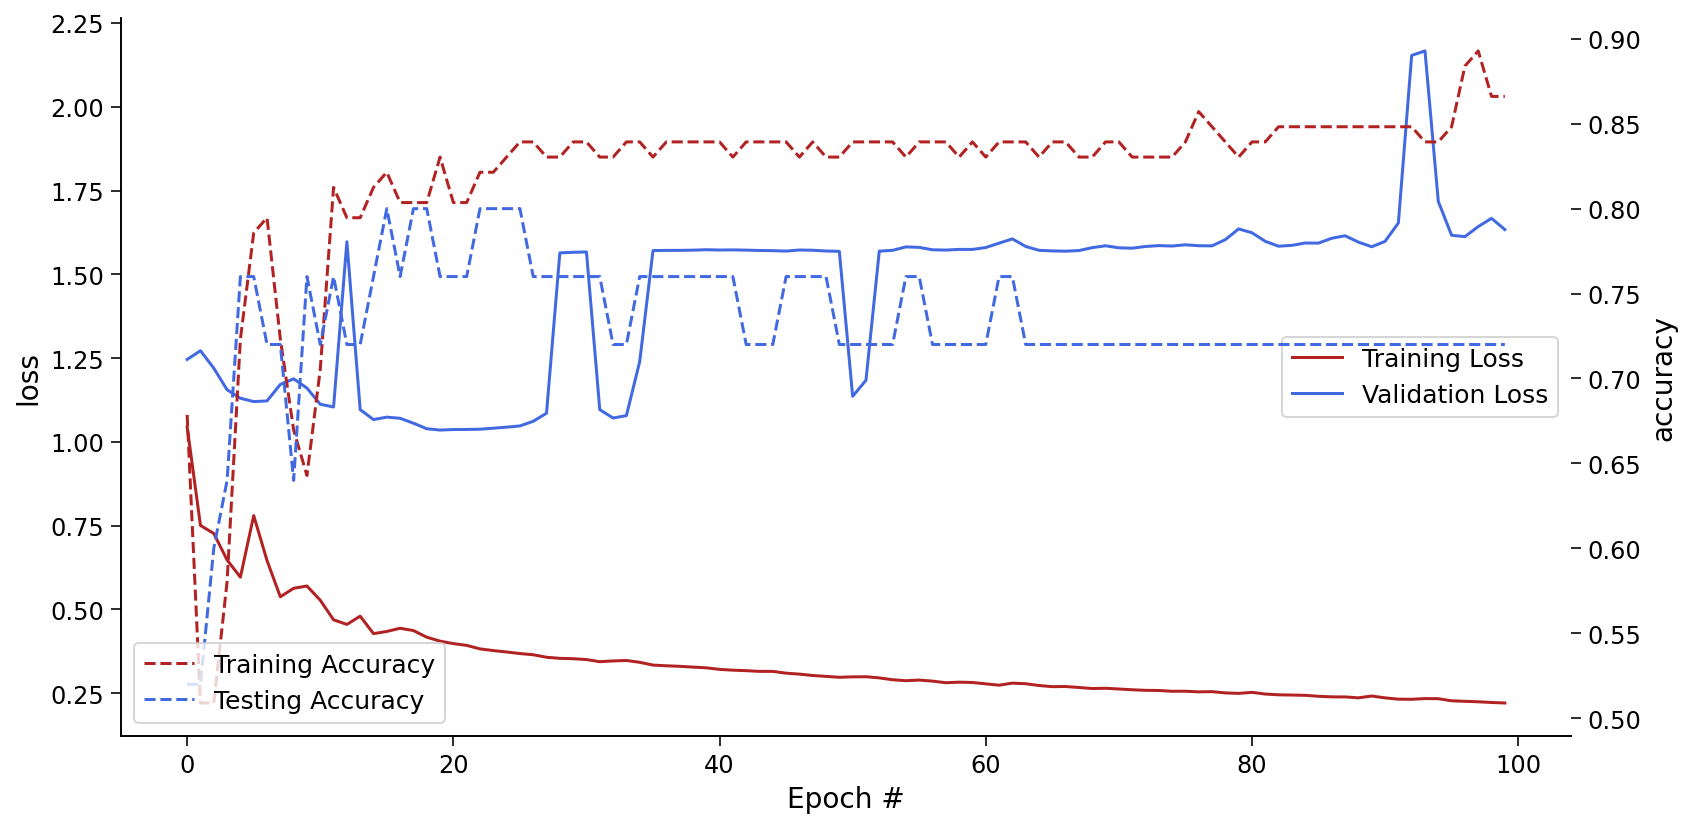

In [ ]:
# Simple feedforward NN
from keras.models import Sequential
from keras.layers import Dense


model_deep = keras.models.Sequential([
    keras.layers.Dense(29, input_dim=58, activation="selu"),
    keras.layers.Dense(29, activation="selu"),
     keras.layers.Dense(1, activation="tanh")
])

#compile the deep RNN

model_deep.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])
hist = model_deep.fit(X_train,Y_train,batch_size=50,epochs=100,validation_data=(X_test, Y_test))
plot_training_history(hist)


In [ ]:
# SENSITIVITY ANALYSIS

# mean and std for each input column
base_arr = np.mean(X_scale, axis = 0)
std = np.std(X_scale, axis = 0)

# set up input variable names
X_col_names = list(df1.columns[:-2])
var_list = []

# set up array
array = np.zeros((11,58))
array[0] = base_arr

# repeat process for each input variable
for j in range(58):

  # normal dist for one column
  norm = np.random.normal(base_arr[j], std[j], 10)

  # fill in array with changing input values for each column
  for i in range(10):
    temp_array = base_arr
    temp_array[j] = norm[i]
    array[i + 1] = temp_array


  # prediction as input value changes
  base_predict = model_deep.predict(array)
  base_predict1 = np.ravel(base_predict[:, 0])

  # list output for each random input
  list_1 = [base_predict1, array[:,j]]
  temp_df = pd.DataFrame(list_1).T

  # correlation between output and what was added to input
  corr = temp_df[0].corr((temp_df[1] - base_arr[j]))
  var_list.append([X_col_names[j], corr])

# data frame for variables and sensitivity
df_sensitivity = pd.DataFrame(var_list)
x = df_sensitivity.nlargest(10, [1])
x.columns=['Toxin','Sensitivity']
x

,Toxin,Sensitivity
1,MEHHP,0.996558
20,OH_FLU_2,0.990571
21,OH_PHE_23,0.984189
2,MEOHP,0.982704
4,MBZP,0.936700
23,OH_PHE_1,0.923730
47,crpro,0.907192
31,Mo,0.882498
16,PrPB,0.881314
34,Se,0.835832


In [ ]:
#HOURGLASS NETWORK

class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)


Epoch 1/50
2/2 [==============================] - 0s 65ms/step - loss: 0.6771 - accuracy: 0.0123 - val_loss: 0.5681 - val_accuracy: 0.0104
Epoch 2/50
2/2 [==============================] - 0s 10ms/step - loss: 0.5903 - accuracy: 0.0125 - val_loss: 0.5535 - val_accuracy: 0.0104
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 0.5578 - accuracy: 0.0129 - val_loss: 0.5430 - val_accuracy: 0.0104
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: 0.5306 - accuracy: 0.0132 - val_loss: 0.5398 - val_accuracy: 0.0104
Epoch 5/50
2/2 [==============================] - 0s 9ms/step - loss: 0.5172 - accuracy: 0.0129 - val_loss: 0.5424 - val_accuracy: 0.0104
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 0.5076 - accuracy: 0.0129 - val_loss: 0.5160 - val_accuracy: 0.0104
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: 0.4911 - accuracy: 0.0129 - val_loss: 0.5051 - val_accuracy: 0.0104
Epoch 8/50
2/2 [===============

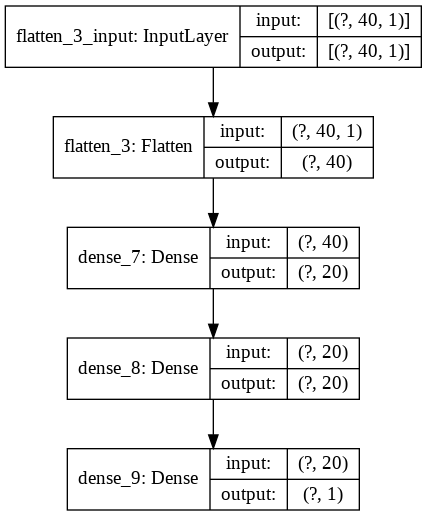

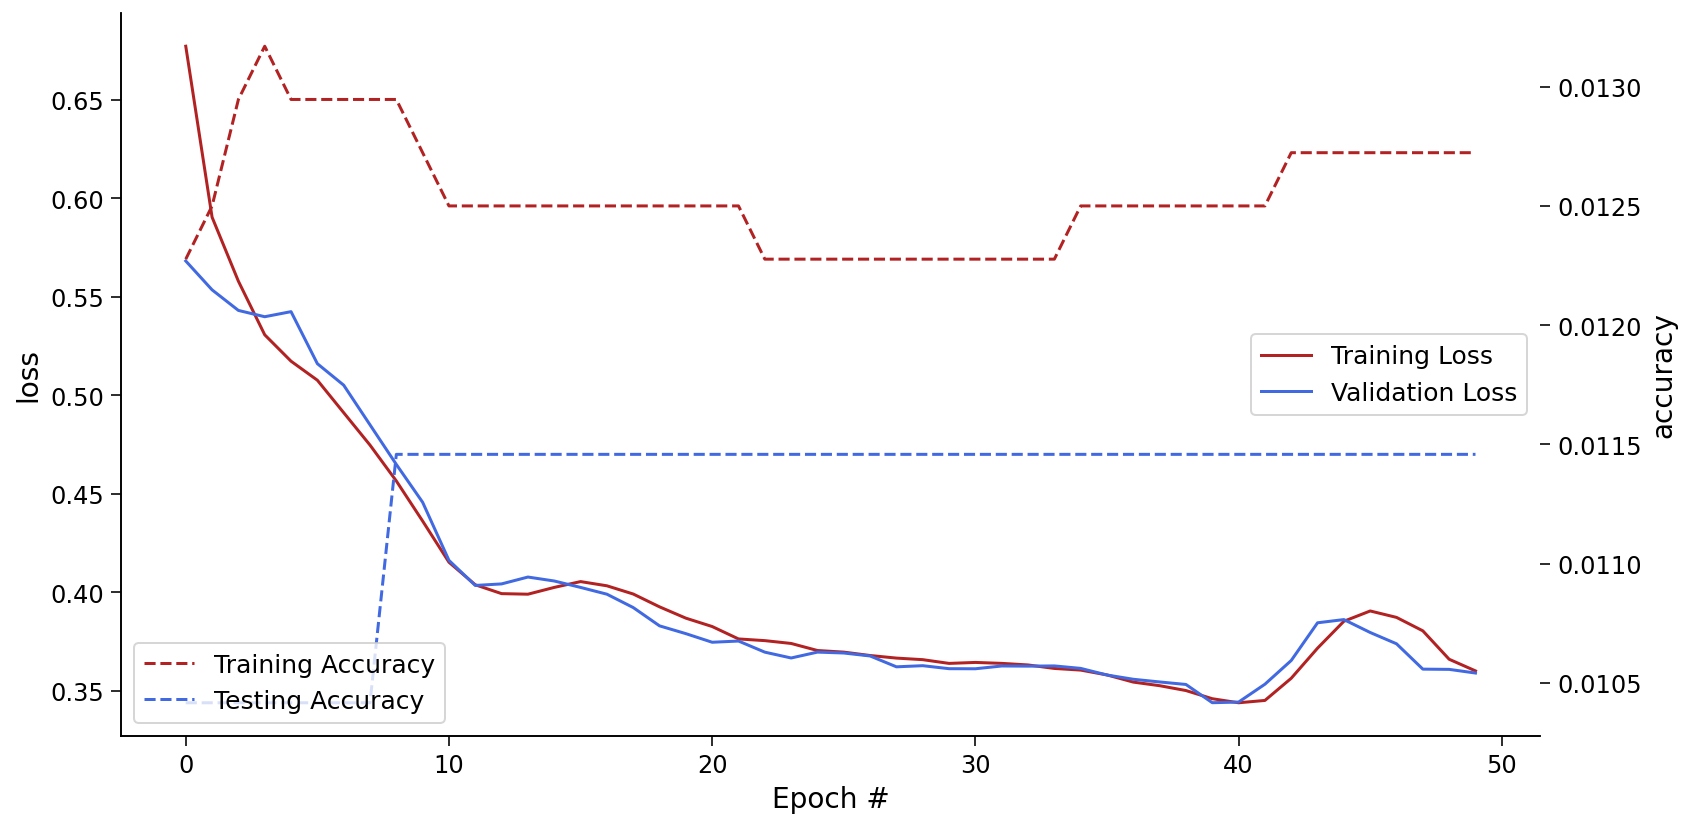

In [ ]:
#tie weights
dense_1 = Dense(100, activation="selu")
dense_2 = Dense(30, activation="selu")

tied_encoder = Sequential([
    Flatten(input_shape = [40,1]),
    dense_1,
    dense_2
])

tied_decoder = Sequential([
    DenseTranspose(dense_2), #, activation="selu"
    DenseTranspose(dense_1), #, activation="sigmoid"),
    Reshape([40,1])
])


model_deep = keras.models.Sequential([
    Flatten(input_shape = [40,1]),                                 
    keras.layers.Dense(20),
    keras.layers.Dense(20),
    keras.layers.Dense(1)
])

tied_ae = Sequential([tied_encoder, tied_decoder])
tied_ae.compile(loss="binary_crossentropy",optimizer='adam', metrics=['accuracy'])
history_tied = tied_ae.fit(X_train, X_train, batch_size=100,epochs=50,validation_data=(X_val, X_val))
plot_training_history(history_tied)

#plot
plot_model(model_deep, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# SENSITIVITY ANALYSIS for hourglass network

# mean and std for each input column
base_arr = np.mean(X_scale, axis = 0)
std = np.std(X_scale, axis = 0)

# set up input variable names
X_col_names = list(df1.columns[:-2])
var_list = []

# set up array
array = np.zeros((11,40))
array[0] = base_arr

# repeat process for each input variable
for j in range(40):

  # normal dist for one column
  norm = np.random.normal(base_arr[j], std[j], 10)

  # fill in array with changing input values for each column
  for i in range(10):
    temp_array = base_arr
    temp_array[j] = norm[i]
    array[i + 1] = temp_array


  # prediction as input value changes
  base_predict = model_deep.predict(array)
  base_predict1 = np.ravel(base_predict[:, 0])

  # list output for each random input
  list_1 = [base_predict1, array[:,j]]
  temp_df = pd.DataFrame(list_1).T

  # correlation between output and what was added to input
  corr = temp_df[0].corr((temp_df[1] - base_arr[j]))
  var_list.append([X_col_names[j], corr])

# data frame for variables and sensitivity
df_sensitivity = pd.DataFrame(var_list)
x = df_sensitivity.nlargest(10, [1])
x.columns=['Toxin','Sensitivity']
x

,Toxin,Sensitivity
0,Unnamed: 0,1.000000
1,MEHP,0.999988
2,MEHHP,0.995515
4,MECPP,0.991245
25,OH_PHE_4,0.966527
27,As,0.955144
18,TCS,0.799811
26,OH_PYR_1,0.776990
10,BPA,0.749682
14,BuPB,0.716618
